In [3]:
import tweepy
import pandas as pd 
import re
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
api_key = "G6zvTjznUK0KDkjAcO0BTFUyy"
api_key_secret = "ZNz52kv37fgH5oIBc0bA1Ap2MSrKwArB3JMwfE7EkrvUIiXtwO"
access_token = "1178827899425579008-57y773Kcuzkvzap7tT74JOQNxG7cnC"
access_token_secret = "DkK0291mihkwM0eerGH4grg9K6g03MYw4JiGHM246lP2I"

In [5]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [19]:
posts = api.user_timeline(screen_name="IndosatOoredoo", lang="en", count = 1000, tweet_mode="extended")

print("showw the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' +tweet.full_text + '\n')
    i = i + 1

showw the 5 recent tweets: 

1) @JawaraSantuy Hai kak mohon maaf atas kendala jaringannya, sebagai langkah awal kakak bisa on off hp 1-5 menit jika masih sama yuk infokan nomor dan detail alamat ya via DM. Salam^Qila
https://t.co/0RXhGGW1zB

2) @Coztanboyy Hai Kak, kami sudah balas via DM ya, bisa dicek DM-nya kak. Salam ^esta

3) @anang451 @anang451 Sama-sama Kak. Terimakasih ya untuk kesetiaannya menggunakan produk Indosat Ooredoo. Jangan ragu hubungi kami ya Kak apabila ada yang ingin ditanyakan. Salam^Wayan

4) @gaplek_OnLY Hai Kak, terkait pemenang giveaway akan diumumkan langsung di Sosial Media Indosat Ooredoo ya Kak. Mohon menunggu updatenya ya. ^Era

5) @anang451 Hai kak, maaf banget untuk pengalamannya bisa dibantu infokan :
1. Nomer hp yang terkendala
2. Jaringan yang muncul
3. Lokasi Lengkap ( RT/RW, Jl, Kel, Kec, Kab/Kota)
4. Nomer alternatif yang bisa dihubungi
kirim via DM ya kak agar mimin bantu proses. Salam ^Hasby



In [20]:
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=["Tweets"])

df.head()

,Tweets
0,@JawaraSantuy Hai kak mohon maaf atas kendala ...
1,"@Coztanboyy Hai Kak, kami sudah balas via DM y..."
2,@anang451 @anang451 Sama-sama Kak. Terimakasih...
3,"@gaplek_OnLY Hai Kak, terkait pemenang giveawa..."
4,"@anang451 Hai kak, maaf banget untuk pengalama..."


In [21]:
text = df['Tweets'].tolist()
print(len(text))

200


In [22]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'RT[\s]+', '',text)
    
    return text

df['Tweets']= df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"Hai kak mohon maaf atas kendala jaringannya, ..."
1,"Hai Kak, kami sudah balas via DM ya, bisa dic..."
2,Sama-sama Kak. Terimakasih ya untuk kesetiaa...
3,"_OnLY Hai Kak, terkait pemenang giveaway akan ..."
4,"Hai kak, maaf banget untuk pengalamannya bisa..."
...,...
195,"Meski di tengah pandemi, namun acara ini tetap..."
196,"Wali Kota Balikpapan, Rahmad Mas'ud; Rektor In..."
197,Juga turut dihadiri oleh Deputi IV Kementerian...
198,Acara peluncuran Indosat Ooredoo 5G ini diresm...


In [23]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"Hai kak mohon maaf atas kendala jaringannya, ...",0.0,0.0
1,"Hai Kak, kami sudah balas via DM ya, bisa dic...",0.0,0.0
2,Sama-sama Kak. Terimakasih ya untuk kesetiaa...,0.0,0.0
3,"_OnLY Hai Kak, terkait pemenang giveaway akan ...",1.0,0.0
4,"Hai kak, maaf banget untuk pengalamannya bisa...",0.0,0.0
...,...,...,...
195,"Meski di tengah pandemi, namun acara ini tetap...",0.0,0.0
196,"Wali Kota Balikpapan, Rahmad Mas'ud; Rektor In...",0.0,0.0
197,Juga turut dihadiri oleh Deputi IV Kementerian...,0.0,0.0
198,Acara peluncuran Indosat Ooredoo 5G ini diresm...,0.0,0.0


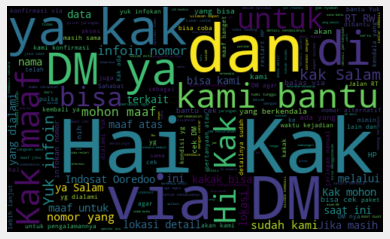

In [24]:
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [25]:
def getAnalysis(score):
    if score > 0:
        return 'positif'
    elif score == 0:
        return 'netral'
    else:
        return 'negatif'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"Hai kak mohon maaf atas kendala jaringannya, ...",0.0,0.0,netral
1,"Hai Kak, kami sudah balas via DM ya, bisa dic...",0.0,0.0,netral
2,Sama-sama Kak. Terimakasih ya untuk kesetiaa...,0.0,0.0,netral
3,"_OnLY Hai Kak, terkait pemenang giveaway akan ...",1.0,0.0,netral
4,"Hai kak, maaf banget untuk pengalamannya bisa...",0.0,0.0,netral
...,...,...,...,...
195,"Meski di tengah pandemi, namun acara ini tetap...",0.0,0.0,netral
196,"Wali Kota Balikpapan, Rahmad Mas'ud; Rektor In...",0.0,0.0,netral
197,Juga turut dihadiri oleh Deputi IV Kementerian...,0.0,0.0,netral
198,Acara peluncuran Indosat Ooredoo 5G ini diresm...,0.0,0.0,netral


In [26]:
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'positif'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1)  Hai Kak Hanna, mohon maaf untuk kendala akses yang dialami, yuk bisa clear cache aplikasi berjalan. Jika masih berkendala, bisa infokan nomor hp, nama yang terdaftar, dan lokasi detail via DM agar kami bantu cek. ^Kuki  

2)  Hai kak, maaf atas kendala yang dialami ya kak, agar nanti untuk aksesnya bisa normal kembali mimin bantu penormalanya ya ka, ukt handphone nya nanti bisa dimatikan selama 5 menit , jika masih terkendala bisa konfirmasi kembali agar segera kami bantu . Salam^Sarah

3)  Hai Kak. Kami informasikan Kakak bisa cek paket promo menarik melalui menu *929, *123*60 atau aplikasi myIM3 ya Kak. Thanks ^Era

4)  Baik Kak, mohon ditunggu update selanjutnya ya. kami usahakan secepatnya bisa normal kembali. Salam ^Una

5) Hai Sahabat! Selamat kepada pemenang dari Kuis 5GMakassar:

 
 
 
 
 

Masing-masing pemenang mendapat 1 Box of Happiness! Selamat, ya! Mohon untuk mengirimkan data diri 4x24 jam melalui DM. Terima kasih telah berpartisipasi!

6)  Hai kak, mohon maaf jika s

In [27]:
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'negatif'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1)  Jika masih sama, mohon dibantu infokan,

Nomor : 
Waktu detail kejadian : (Tanggal dan jam)
Signal data :
Lokasi detail : (Jalan, RT/RW, Kelurahan, Kecamatan, Kota, Provinsi)
Nomor alternatif :

Kami tunggu konfirmasinya via DM ya kak. Salam^Dee (2/2)

2)  Hi Kak, sorry untuk hal yang dialami.  Yuk infoin ke DM  nomor yang terkendala, waktu kejadian, nama paket yang di isi supaya mimin bisa cek lebih lanjut. ^Gani

3)  Hi Kak, sorry untuk hal yang dialami. Yuk infoin lewat DM  nomor yang terkendala, waktu kejadian supaya mimin bisa bantu cek lebih lanjut. ^Gani

4)  Hi Kak, sorry untuk hal yang dialami. Yuk infoin nomor yang terkendala lewat DM supaya mimin bisa bantu cek  ^Gani

5)  Hi Kak, maaf ya untuk ketidaknyamanan yg dialami. Mohon infokan data berikut via DM: 
Nama :
Nomor yang dikeluhkan :
Waktu detail kejadian : 
Signal Data :
Lokasi detail : (Nama gedung, jalan,RT/RW)
Nomor Alternatif : 
^Jane

6)  Hai kak,maaf atas kondisinya.  Jika masih sama bisa infokan: 
Nama :
Nomo

In [28]:
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'netral'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1)  Hai kak mohon maaf atas kendala jaringannya, sebagai langkah awal kakak bisa on off hp 1-5 menit jika masih sama yuk infokan nomor dan detail alamat ya via DM. Salam^Qila


2)  Hai Kak, kami sudah balas via DM ya, bisa dicek DM-nya kak. Salam ^esta

3)   Sama-sama Kak. Terimakasih ya untuk kesetiaannya menggunakan produk Indosat Ooredoo. Jangan ragu hubungi kami ya Kak apabila ada yang ingin ditanyakan. Salam^Wayan

4) _OnLY Hai Kak, terkait pemenang giveaway akan diumumkan langsung di Sosial Media Indosat Ooredoo ya Kak. Mohon menunggu updatenya ya. ^Era

5)  Hai kak, maaf banget untuk pengalamannya bisa dibantu infokan :
1. Nomer hp yang terkendala
2. Jaringan yang muncul
3. Lokasi Lengkap ( RT/RW, Jl, Kel, Kec, Kab/Kota)
4. Nomer alternatif yang bisa dihubungi
kirim via DM ya kak agar mimin bantu proses. Salam ^Hasby

6)  Hai Kak, untuk kendalanya akan kami bantu, yuk infokan lebih lanjut via DM  Salam^Zakia

7)  Hai kak Adit, ada yang bisa kami bantu? Yuk infoin detail pertanya

In [29]:
ptweets = df[df.Analysis == 'positif' ]
ptweets = ptweets['Tweets']

round( ptweets.shape[0] / df.shape[0] *100 , 1)

11.0

In [30]:
ntweets = df[df.Analysis == 'negatif' ]
ntweets = ntweets['Tweets']

round( ntweets.shape[0] / df.shape[0] *100 , 1)

3.5

In [31]:
netweets = df[df.Analysis == 'netral' ]
netweets = netweets['Tweets']

round( netweets.shape[0] / df.shape[0] *100 , 1)

85.5

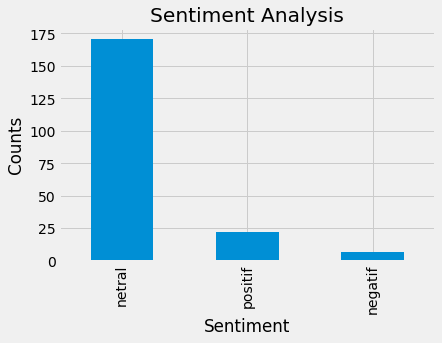

In [32]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()